# Comparing GAN Training Stability and Output Quality

This notebook visualizes outputs from 4 different GAN models trained on the Fashion-MNIST dataset. Each model builds upon the previous one by incorporating classic stabilization tricks discussed in the *Understanding Deep Learning* seminar and textbook.

We display the generated samples at Epoch 1 and Epoch 10 for each model. Try to assess:  
- How realistic the samples are  
- Whether the model captures all 10 categories  
- If diversity improves across models  


### Fashion-MNIST Categories

The generator is trained to produce one of the following 10 classes, conditioned on a label (0–9):

0 — T-shirt/top

1 — Trouser

2 — Pullover

3 — Dress

4 — Coat

5 — Sandal

6 — Shirt

7 — Sneaker

8 — Bag

9 — Ankle boot

Keep this in mind as you compare model outputs. Try to assess:
- Does the model generate all 10 classes?
- Are some classes easier to generate (e.g., trousers, sneakers)?

Dataset: [Fashion-MNIST on Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1. MLP Naive (No Tricks)

A basic conditional GAN using fully connected layers.  
No stabilization tricks applied — no BatchNorm, no LeakyReLU, no tuning of optimizer hyperparameters.

Expected to be unstable and prone to mode collapse or slow learning.


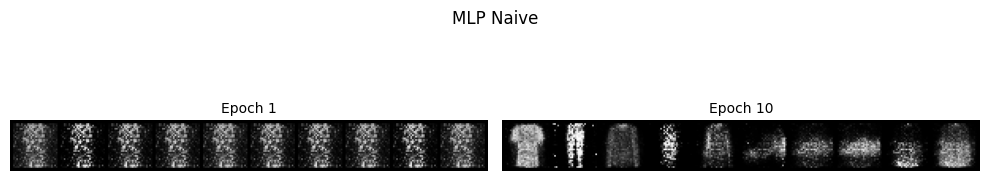

In [9]:
# === MLP Naive ===
import os
from PIL import Image
import matplotlib.pyplot as plt

epochs = [1, 10] 
model = "mlp_naive"
label = "MLP Naive"

fig, axs = plt.subplots(1, len(epochs), figsize=(10, 2.5))

for col, epoch in enumerate(epochs):
    img_path = f'samples/{model}/epoch_{epoch}.png'
    img = Image.open(img_path)
    axs[col].imshow(img, cmap='gray')
    axs[col].axis('off')
    axs[col].set_title(f'Epoch {epoch}', fontsize=10)

fig.suptitle(label, fontsize=12)
plt.tight_layout()
plt.show()


## 2. MLP Stable

Same architecture as naive, but with three classic improvements:  
- **BatchNorm** in the generator  
- **LeakyReLU** in the discriminator  
- **Adam optimizer** with tuned momentum (`betas=(0.5, 0.999)`)

Expected to show better convergence and improved sample quality.


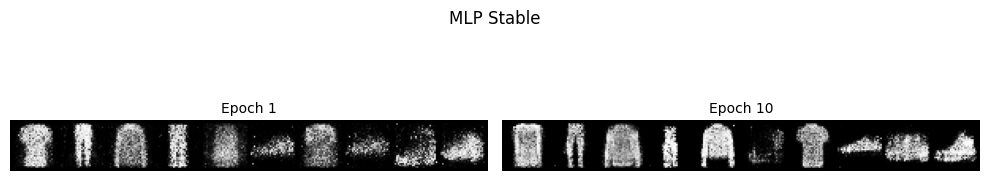

In [10]:
# === MLP Stable ===
epochs = [1, 10]
model = "mlp_stable"
label = "MLP Stable"

fig, axs = plt.subplots(1, len(epochs), figsize=(10, 2.5))

for col, epoch in enumerate(epochs):
    img_path = f'samples/{model}/epoch_{epoch}.png'
    img = Image.open(img_path)
    axs[col].imshow(img, cmap='gray')
    axs[col].axis('off')
    axs[col].set_title(f'Epoch {epoch}', fontsize=10)

fig.suptitle(label, fontsize=12)
plt.tight_layout()
plt.show()


## 3. MLP Tricks (Feature Matching + Minibatch Discrimination)

Built on top of the "Stable" model with two additional tricks:  
- **Feature Matching**: Encourages generator to match intermediate activations in the discriminator  
- **Minibatch Discrimination**: Helps prevent mode collapse by forcing the generator to produce diverse outputs within a batch

Intended to further improve stability and output diversity.


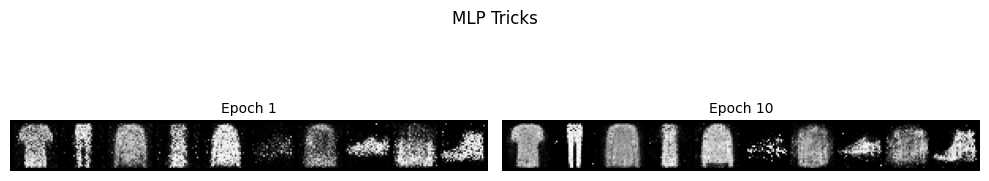

In [11]:
# === MLP Tricks (Feature Matching + Minibatch Disc) ===
epochs = [1, 10] 
model = "mlp_tricks"
label = "MLP Tricks"

fig, axs = plt.subplots(1, len(epochs), figsize=(10, 2.5))

for col, epoch in enumerate(epochs):
    img_path = f'samples/{model}/epoch_{epoch}.png'
    img = Image.open(img_path)
    axs[col].imshow(img, cmap='gray')
    axs[col].axis('off')
    axs[col].set_title(f'Epoch {epoch}', fontsize=10)

fig.suptitle(label, fontsize=12)
plt.tight_layout()
plt.show()


## 4. CNN-based GAN (DCGAN-style)

This model uses a convolutional architecture similar to the original DCGAN, applying the following stabilization tricks:
- **Strided convolutions** for upsampling and downsampling
- **BatchNorm** in both generator and discriminator (excluding first/last layers)
- **LeakyReLU** activations in the discriminator
- **Adam optimizer** with low momentum (`betas=(0.5, 0.999)`)

Compared to MLPs, DCGAN typically generates sharper and more coherent images — but it can still suffer from vanishing gradients or instability.


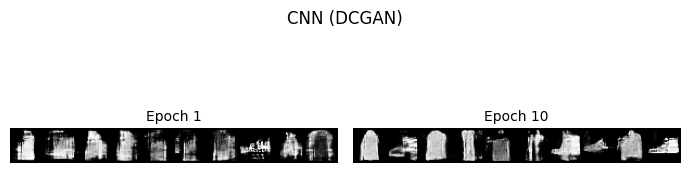

In [12]:
# === CNN (DCGAN) ===
epochs = [1, 10]  # only 10 epochs trained
model = "cnn"
label = "CNN (DCGAN)"

fig, axs = plt.subplots(1, len(epochs), figsize=(7, 2.5))

for col, epoch in enumerate(epochs):
    img_path = f'samples/{model}/epoch_{epoch}.png'
    img = Image.open(img_path)
    axs[col].imshow(img, cmap='gray')
    axs[col].axis('off')
    axs[col].set_title(f'Epoch {epoch}', fontsize=10)

fig.suptitle(label, fontsize=12)
plt.tight_layout()
plt.show()


# Summary

We encourage you to reflect on:
- How each trick helped (or didn’t) stabilize training
- Whether visual improvements align with training loss logs
- Which model captured Fashion-MNIST categories best

Feel free to rerun training or try your own modifications!
